In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import xgboost as xgb
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, roc_auc_score)
from sklearn.model_selection import cross_val_score

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to your CSV file
file_path = '/content/drive/My Drive/heart_disease.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Finding missing values
print(df.isna().sum())

# Handle missing values if any (filling with mean)
df.fillna(df.mean(), inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Removing duplicate rows
df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.shape

(303, 14)

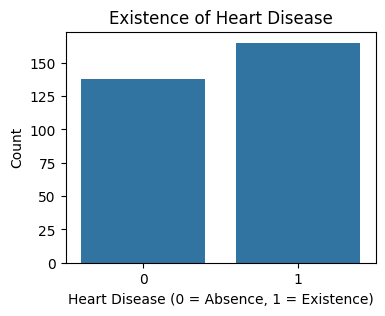

In [8]:
# Plotting the distribution of the target variable
plt.figure(figsize=(4, 3))
sns.countplot(x='target', data=df)
plt.title('Existence of Heart Disease')
plt.xlabel('Heart Disease (0 = Absence, 1 = Existence)')
plt.ylabel('Count')
plt.show()

<Axes: >

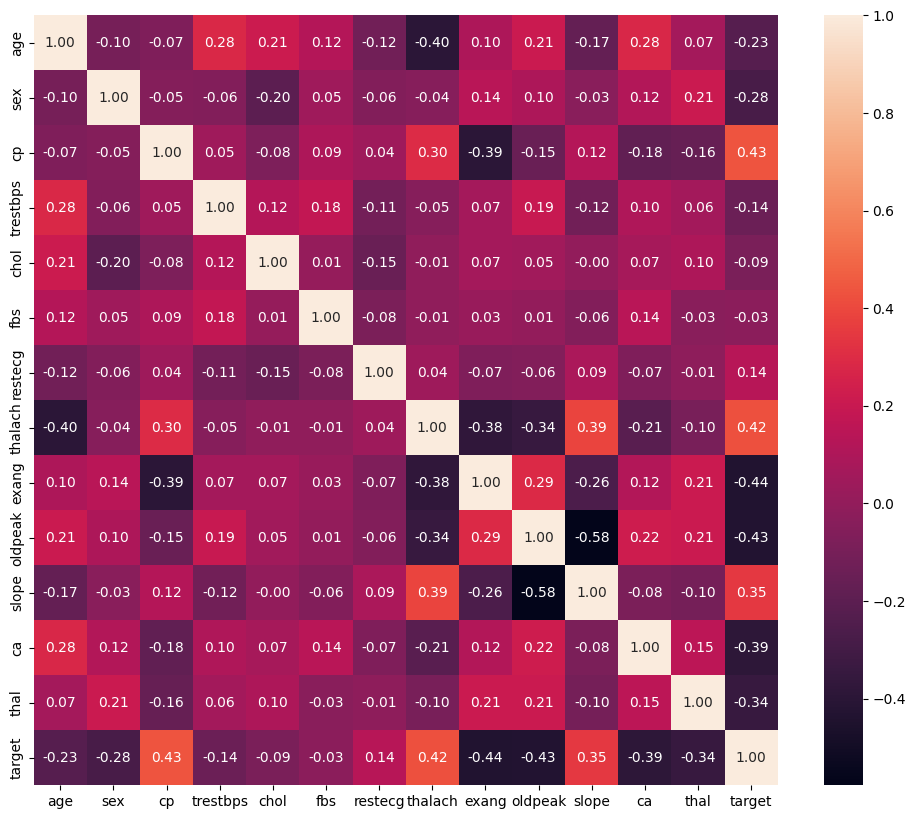

In [9]:
# Plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

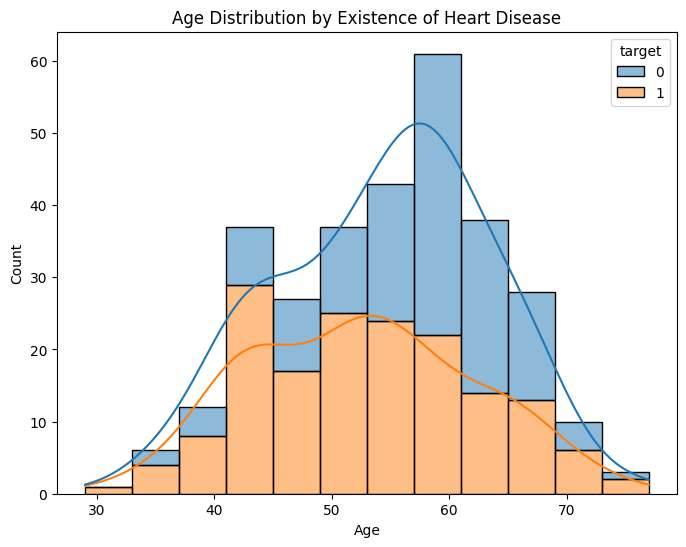

In [10]:
# Plotting age distribution with respect to target
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Existence of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

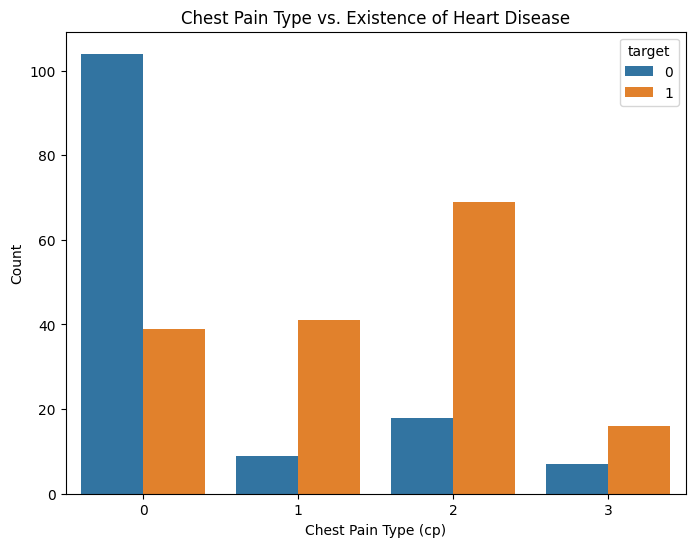

In [11]:
# Analyzing chest pain type with respect to target
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs. Existence of Heart Disease')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.show()

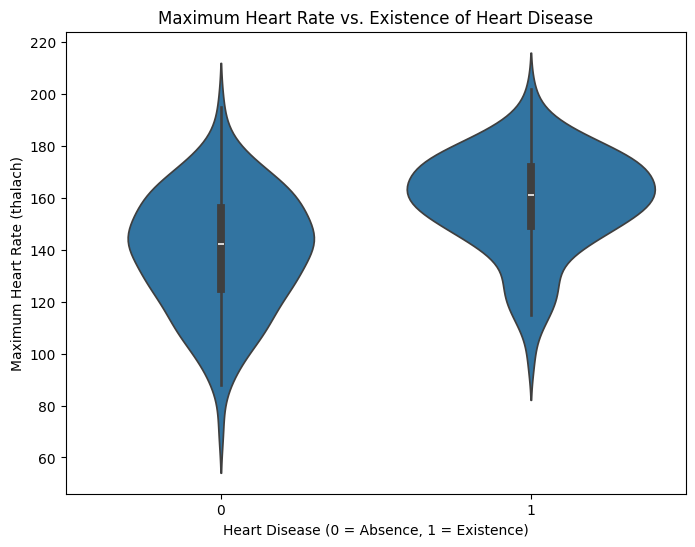

In [12]:
# Analyzing maximum heart rate with respect to target
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate vs. Existence of Heart Disease')
plt.xlabel('Heart Disease (0 = Absence, 1 = Existence)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

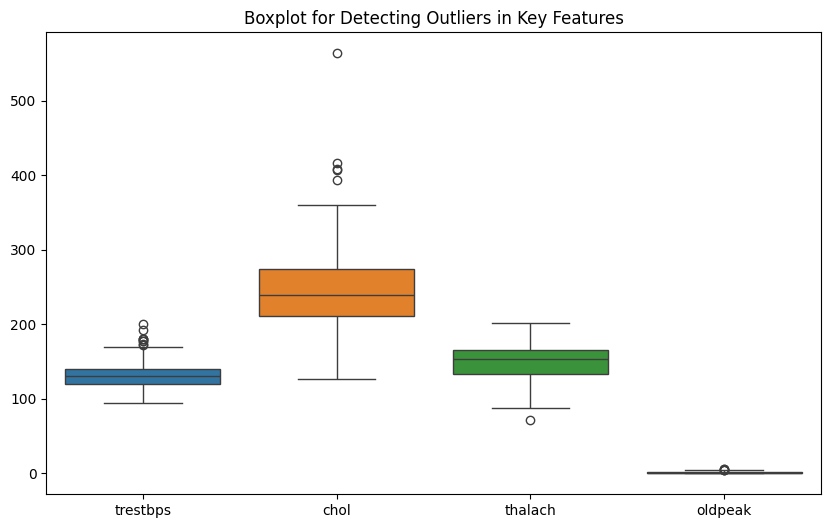

In [13]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Boxplot for Detecting Outliers in Key Features')
plt.show()

In [14]:
# Define the features (X) and the target (y)
X = df.drop('target', axis=1)
y = df['target']

In [15]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
def scores(actual, predicted):
  # Evaluation Metrics
  accuracy = accuracy_score(actual, predicted)
  precision = precision_score(actual, predicted)
  recall = recall_score(actual, predicted)
  f1 = f1_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  class_report = classification_report(actual, predicted)

  # Print Evaluation Metrics
  print("Accuracy:", accuracy*100)
  print("Precision:", precision*100)
  print("Recall:", recall*100)
  print("F1 Score:", f1*100)
  print("Confusion Matrix:\n", conf_matrix)
  print("Classification Report:\n", class_report)

In [17]:
# Naive Bayes

nb = GaussianNB()
# Train the Naive Bayes model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)
scores(y_test, y_pred_nb)

Accuracy: 86.88524590163934
Precision: 90.0
Recall: 84.375
F1 Score: 87.09677419354838
Confusion Matrix:
 [[26  3]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [18]:
# Logistic Regression

lr = LogisticRegression()
# Train the Logistic Regression model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = lr.predict(X_test)
scores(y_test, y_pred_log)

Accuracy: 85.24590163934425
Precision: 87.09677419354838
Recall: 84.375
F1 Score: 85.71428571428571
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [19]:
# SVM model with different kernels

kernels = ['linear', 'sigmoid', 'rbf', 'poly']

# Train the SVM model
for kernel in kernels:
    model = SVC(kernel=kernel, degree=3, gamma='scale', coef0=0)
    model.fit(X_train, y_train)
    y_pred_svm = model.predict(X_test)

    # Evaluate the model
    print(f"Kernel: {kernel}")
    scores(y_test, y_pred_svm)

Kernel: linear
Accuracy: 86.88524590163934
Precision: 87.5
Recall: 87.5
F1 Score: 87.5
Confusion Matrix:
 [[25  4]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Kernel: sigmoid
Accuracy: 86.88524590163934
Precision: 87.5
Recall: 87.5
F1 Score: 87.5
Confusion Matrix:
 [[25  4]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Kernel: rbf
Accuracy: 86.88524590163934
Precisi

In [20]:
# Decision Tree Classifier

dtc = DecisionTreeClassifier(max_depth = 50, min_samples_leaf = 50)
dtc.fit(X_train, y_train)

# Predict Labels
y_pred_dtc = dtc.predict(X_test)
scores(y_test, y_pred_dtc)

Accuracy: 83.60655737704919
Precision: 77.5
Recall: 96.875
F1 Score: 86.11111111111111
Confusion Matrix:
 [[20  9]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.69      0.80        29
           1       0.78      0.97      0.86        32

    accuracy                           0.84        61
   macro avg       0.86      0.83      0.83        61
weighted avg       0.86      0.84      0.83        61



In [21]:
# Create the XGBoost classifier
xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)
scores(y_test, y_pred_xgb)

Accuracy: 81.9672131147541
Precision: 86.20689655172413
Recall: 78.125
F1 Score: 81.9672131147541
Confusion Matrix:
 [[25  4]
 [ 7 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:12:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [88]:
# KNN Classifier

knn = KNeighborsClassifier(n_neighbors=6)

# Train the KNeighborsClassifier model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

scores(y_test, y_pred_knn)

Accuracy: 90.1639344262295
Precision: 93.33333333333333
Recall: 87.5
F1 Score: 90.32258064516128
Confusion Matrix:
 [[27  2]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [23]:
class RandomForestClassifier:
    def __init__(self, n_trees=100, max_depth=None, min_samples_leaf=1, max_features='auto'):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []

    def _get_max_features(self, n_features):
        if self.max_features == 'auto':
            return int(np.sqrt(n_features))
        elif self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        else:
            return self.max_features

    def fit(self, X, y):
        n_samples, n_features = X.shape
        max_features = self._get_max_features(n_features)

        for _ in range(self.n_trees):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y.iloc[indices]

            # Randomly select features
            feature_indices = np.random.choice(n_features, max_features, replace=False)
            X_sample = X_sample[:, feature_indices]

            # Create a decision tree and fit it
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_sample, y_sample)
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        # Aggregate predictions from each tree
        tree_predictions = np.array([tree.predict(X[:, feature_indices]) for tree, feature_indices in self.trees])

        # Use majority voting
        return np.array([np.bincount(tree_preds).argmax() for tree_preds in tree_predictions.T])

In [60]:
# Initialize and train the Random Forest Classifier
rfc_model = RandomForestClassifier(n_trees=50, max_depth=50, min_samples_leaf=50, max_features=5)
rfc_model.fit(X_train, y_train)

# Make predictions
y_pred_rfc_model = rfc_model.predict(X_test)
scores(y_test, y_pred_rfc_model)

Accuracy: 91.80327868852459
Precision: 90.9090909090909
Recall: 93.75
F1 Score: 92.3076923076923
Confusion Matrix:
 [[26  3]
 [ 2 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [ ]:
# Random Forest

rfc = RandomForestClassifier(n_estimators=50, max_depth=50, min_samples_leaf=50, max_features=4, bootstrap=True)
rfc.fit(X_train, y_train)

# Predict labels
y_pred_rfc = rfc.predict(X_test)
scores(y_test, y_pred_rfc)

Accuracy: 93.44262295081968
Precision: 91.17647058823529
Recall: 96.875
F1 Score: 93.93939393939394
Confusion Matrix:
 [[26  3]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.91      0.97      0.94        32

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



[0.81967213 0.86885246 0.81967213 0.88333333 0.8       ]
83.83060109289617
ROC-AUC Score: 93.15732758620689


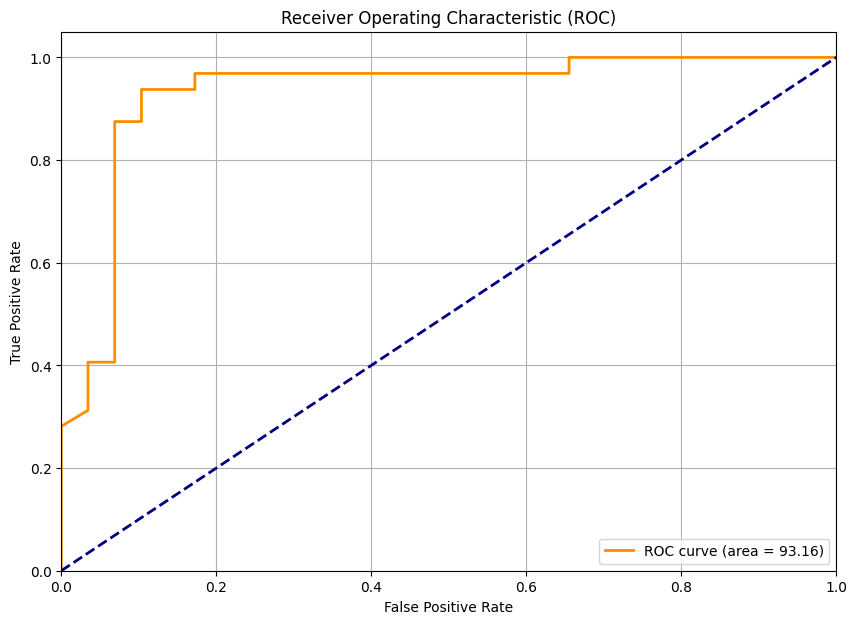

In [ ]:
# RFC Predict probabilities
y_prob = rfc.predict_proba(X_test)[:, 1]

# Evaluation Metrics
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
score = cross_val_score(rfc, X, y, cv=5)
print(score)
print(score.mean()*100)

# Print Evaluation Metrics
print("ROC-AUC Score:", roc_auc*100)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc*100:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()